In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [3]:
training_set = train_datagen.flow_from_directory(r"C:\Users\Abhishek Chaubey\Documents\DancingFramework",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r"C:\Users\Abhishek Chaubey\Documents\DancingFramework",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 7480 images belonging to 2 classes.
Found 7480 images belonging to 2 classes.


In [4]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [5]:
from tensorflow.keras.regularizers import l2

In [6]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [8]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
234/234 [==============================] - 228s 961ms/step - loss: 0.6977 - accuracy: 0.6900 - val_loss: 0.5632 - val_accuracy: 0.7557
Epoch 2/15
234/234 [==============================] - 37s 159ms/step - loss: 0.5388 - accuracy: 0.7626 - val_loss: 0.5715 - val_accuracy: 0.8102
Epoch 3/15
234/234 [==============================] - 37s 159ms/step - loss: 0.4503 - accuracy: 0.7997 - val_loss: 0.4100 - val_accuracy: 0.8106
Epoch 4/15
234/234 [==============================] - 43s 183ms/step - loss: 0.3628 - accuracy: 0.8310 - val_loss: 0.2998 - val_accuracy: 0.8611
Epoch 5/15
234/234 [==============================] - 37s 159ms/step - loss: 0.3087 - accuracy: 0.8579 - val_loss: 0.2715 - val_accuracy: 0.8786
Epoch 6/15
234/234 [==============================] - 37s 159ms/step - loss: 0.2516 - accuracy: 0.8908 - val_loss: 0.2199 - val_accuracy: 0.9199
Epoch 7/15
234/234 [==============================] - 38s 161ms/step - loss: 0.2244 - accuracy: 0.9051 - val_loss: 0.1839 - val_a

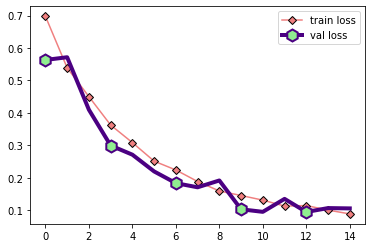

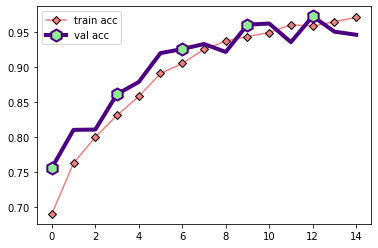

<Figure size 432x288 with 0 Axes>

In [10]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(r.history['val_loss'], label='val loss', color='#4b0082', linewidth=4,
         marker='h', markerfacecolor='lightgreen', markeredgewidth=2,
         markersize=12, markevery=3)
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(r.history['val_accuracy'], label='val acc', color='#4b0082', linewidth=4,
         marker='h', markerfacecolor='lightgreen', markeredgewidth=2,
         markersize=12, markevery=3)
plt.legend()
plt.show()
plt.savefig('AccVal_acc')